# SIMULACIÓN DE TIEMPOS DE ESPERA DE TROMPOS EN UNA PLANTA DE CONCRETO

---

## Objetivos

- Simular cómo se comporta el sistema de carga de materiales en una planta de concreto.  
- Evaluar el tiempo promedio de espera de los camiones según la cantidad de silos en operación.  
- Analizar distintos escenarios con tiempos de llegada y carga aleatorios para proponer mejoras.

---

## Descripción del problema

En una planta de concreto es común que lleguen varios camiones durante el día para cargar materiales como cemento, grava o arena. Cuando hay pocos silos en funcionamiento o cuando los camiones llegan con poca separación entre sí, se pueden formar filas y aumentar los tiempos de espera.  

Este tipo de situaciones es importante en la programación de obra y logística, ya que los retrasos pueden afectar directamente el avance del proyecto. Por eso, es útil analizar este sistema usando simulación y ver cómo responden los tiempos de espera ante distintos escenarios.

---

## Modelo del problema

Para este proyecto se utilizó el método de **Simulación de Monte Carlo**, ya que permite analizar sistemas con variables aleatorias sin necesidad de datos reales. Se eligió este enfoque para simular cómo se comporta una planta de concreto que atiende a varios camiones a lo largo del día.

El sistema simula la **carga de materiales**  desde silos hacia camiones trompo que llegan de manera aleatoria. Al no contar con datos reales, se generaron los tiempos de llegada y de carga usando **distribuciones uniformes**.

### Variables consideradas

- `n_camiones` → número total de camiones (20)
- `n_silos` → cantidad de silos disponibles (2)
- `tiempo_llegada` → tiempo aleatorio entre 0 y 60 minutos
- `tiempo_carga` → tiempo aleatorio entre 5 y 10 minutos
- `espera` → diferencia entre el tiempo de llegada y el inicio de carga
- `inicio_carga` → instante en que el camión comienza a cargar según disponibilidad del silo

### Supuestos del modelo

- Los camiones **llegan uno por uno** a lo largo del tiempo (no todos al mismo tiempo).
- **Solo un camión puede ser atendido por un silo a la vez.**
- No hay fallas, interrupciones ni mantenimiento durante la simulación.
- Todos los camiones reciben **el mismo tipo de carga**, por lo que cualquier silo puede atenderlos.
- **No hay prioridad entre camiones**, se atienden en orden de llegada y disponibilidad.

Este modelo busca representar de forma sencilla y controlada una situación que ocurre en muchas obras reales, permitiendo evaluar el impacto del número de silos en el tiempo total de espera.


---

## Justificación de la distribución utilizada

Como queremos simular situaciones realistas donde no tenemos datos exactos, usamos **distribuciones uniformes** para generar los tiempos de llegada y de carga. Esto nos da valores aleatorios dentro de un rango (por ejemplo, de 1 a 5 minutos), que representan bien la variabilidad que hay en este tipo de procesos.

Elegimos la distribución uniforme porque es simple, fácil de aplicar, y suficiente para observar comportamientos generales del sistema de carga.

---


## PASO 1: DEFINIR PARÁMETROS DE LA SIMULACIÓN

Para empezar, vamos a fijar los datos con los que vamos a trabajar:

- Vamos a simular **20 camiones** que llegan a la planta.
- Hay **2 silos disponibles** para cargar el material.
- Los **tiempos de llegada** de los camiones serán aleatorios entre **0 y 60 minutos**.
- Los **tiempos de carga** de cada camión también serán aleatorios, entre **5 y 10 minutos**.

Estos valores se van a generar usando una **distribución uniforme**, ya que queremos simular diferentes situaciones posibles sin tener datos reales.  
La idea es ver cómo se comporta el sistema con esos datos y más adelante probar si cambiar el número de silos mejora los tiempos de espera.


## PASO 2: GENERAR LOS DATOS ALEATORIOS

En este paso vamos a crear los tiempos de llegada y carga para los 20 camiones.  
Vamos a usar numpy para generar estos datos de forma aleatoria:

- Las llegadas serán números aleatorios entre 0 y 60 minutos.
- Los tiempos de carga serán aleatorios entre 5 y 10 minutos.

Así podemos representar de forma sencilla un día de trabajo en la planta.

Fijamos una semilla con el número 123 para que la simulación sea **reproducible**, es decir, que siempre nos dé los mismos resultados cuando volvamos a correrla.


In [5]:
import numpy as np
import pandas as pd

# ## 1. SEMILLA PARA REPRODUCIR RESULTADOS
np.random.seed(123)

# ## 2. DEFINIMOS EL NÚMERO DE CAMIONES Y DE SILOS
num_camiones = 20
num_silos = 2

# ## 3. GENERAMOS TIEMPOS ALEATORIOS DE LLEGADA Y CARGA
tiempos_llegada = np.random.uniform(0, 60, num_camiones)   # entre 0 y 60 min
tiempos_carga = np.random.uniform(5, 10, num_camiones)     # entre 5 y 10 min

# ## 4. CREAMOS LA TABLA DE CAMIONES
camiones = pd.DataFrame({
    'Tiempo de llegada (min)': np.round(tiempos_llegada, 2),
    'Duración de carga (min)': np.round(tiempos_carga, 2)
})

# ## 5. ORDENAMOS LA TABLA POR ORDEN DE LLEGADA
camiones = camiones.sort_values(by='Tiempo de llegada (min)').reset_index(drop=True)

# ## 6. AGREGAMOS COLUMNAS VACÍAS PARA INICIO DE CARGA Y ESPERA
camiones['Inicio de carga (min)'] = 0.0
camiones['Tiempo de espera (min)'] = 0.0

# ## 7. CREAMOS UNA LISTA QUE NOS DICE EN QUÉ MINUTO ESTÁ LIBRE CADA SILO
silos = [0.0] * num_silos  # todos están libres al inicio

# ## 8. RECORREMOS CADA CAMIÓN PARA VER CUÁNDO CARGA Y CUÁNTO ESPERA
for i in range(num_camiones):
    llegada = camiones.loc[i, 'Tiempo de llegada (min)']
    carga = camiones.loc[i, 'Duración de carga (min)']
    
    # El silo que se libera primero
    silo_libre = np.argmin(silos)
    cuando_esta_libre = silos[silo_libre]
    
    # Si el camión llega antes de que el silo esté libre, tiene que esperar
    inicio_carga = max(llegada, cuando_esta_libre)
    espera = inicio_carga - llegada
    
    # Guardamos los resultados
    camiones.loc[i, 'Inicio de carga (min)'] = round(inicio_carga, 2)
    camiones.loc[i, 'Tiempo de espera (min)'] = round(espera, 2)
    
    # Actualizamos cuándo quedará libre ese silo
    silos[silo_libre] = inicio_carga + carga

# ## 9. MOSTRAMOS LA TABLA FINAL
camiones


,Tiempo de llegada (min),Duración de carga (min),Inicio de carga (min),Tiempo de espera (min)
0,3.58,7.47,3.58,0.00
1,10.53,9.47,10.53,0.00
2,10.95,7.13,11.05,0.10
3,13.61,8.62,18.18,4.57
4,17.17,9.25,20.00,2.83
5,20.59,5.46,26.80,6.21
6,23.53,8.15,29.25,5.72
7,23.88,7.13,32.26,8.38
8,25.39,6.61,37.40,12.01
9,26.31,7.15,39.39,13.08


## PASO 3: ANÁLISIS Y VISUALIZACIÓN DE RESULTADOS

Una vez que simulamos la llegada y carga de los camiones, es importante analizar los resultados para entender cómo funciona el sistema.  
Con esta parte buscamos responder preguntas como:

- ¿Qué tanto esperan los camiones en promedio?
- ¿Cuál fue el peor caso (el camión que más esperó)?
- ¿Cuántos camiones no tuvieron que hacer fila?

También agregamos una **gráfica de barras** para ver claramente cómo fue la espera de cada camión.

Este tipo de análisis nos ayuda a tomar decisiones, por ejemplo, si conviene agregar otro silo o ajustar los horarios de llegada de los camiones.



In [9]:
# Calculamos estadísticas clave del sistema
promedio_espera = camiones['Tiempo de espera (min)'].mean()
maximo_espera = camiones['Tiempo de espera (min)'].max()
camiones_sin_espera = sum(camiones['Tiempo de espera (min)'] == 0)

# Mostramos los resultados con explicación
print(f"Tiempo promedio de espera: {promedio_espera:.2f} minutos")
print(f"Máximo tiempo de espera: {maximo_espera:.2f} minutos")
print(f"Camiones sin espera: {camiones_sin_espera} de {num_camiones}")


Tiempo promedio de espera: 13.13 minutos
Máximo tiempo de espera: 28.65 minutos
Camiones sin espera: 2 de 20


### Gráfica de tiempos de espera por camión

Con la siguiente gráfica de barras podemos ver cuántos minutos esperó cada camión.  
Esto nos ayuda a detectar si hay muchos casos con esperas altas o si la mayoría fue atendida rápido.


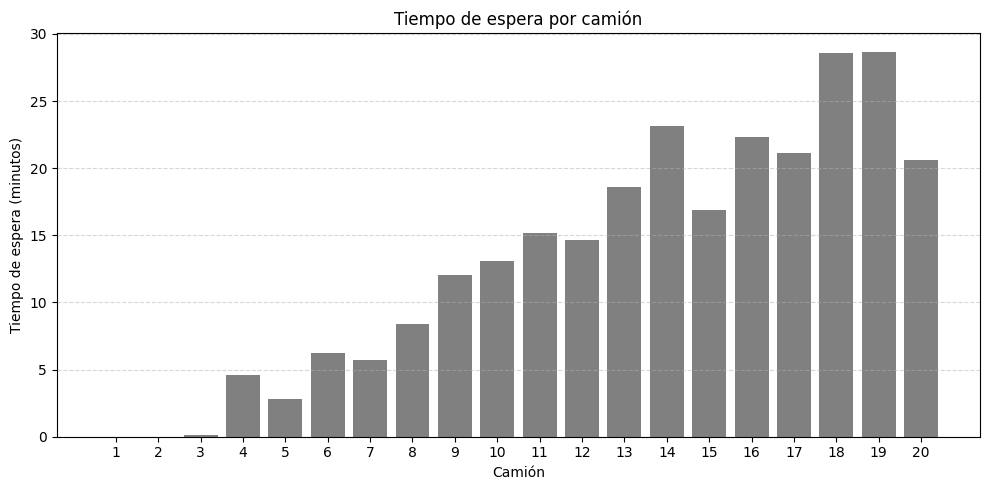

In [10]:
# Importamos la librería para gráficas
import matplotlib.pyplot as plt

# Creamos la gráfica
plt.figure(figsize=(10, 5))
plt.bar(camiones.index + 1, camiones['Tiempo de espera (min)'], color='gray')

plt.title('Tiempo de espera por camión')
plt.xlabel('Camión')
plt.ylabel('Tiempo de espera (minutos)')
plt.xticks(camiones.index + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**¿Qué se puede observar?**

- La mayoría de los camiones tuvo un tiempo de espera bajo (algunos incluso cero).
- Hay ciertos casos donde los camiones esperaron más de 10 minutos, lo que podría ser un indicio de que los silos estuvieron ocupados constantemente.
- Si estos picos altos se repiten en muchas simulaciones, podría justificarse agregar un tercer silo.


### GRÁFICA DE TIEMPO DE ESPERA ACUMULADO

Esta gráfica muestra cómo se va acumulando el tiempo total de espera conforme van llegando los camiones.

Nos ayuda a ver si el sistema se congestiona o si los silos están funcionando de forma eficiente.  
Si la línea sube muy rápido, significa que hay muchos camiones esperando.  
Si se mantiene más plana, indica que los camiones son atendidos sin tantas demoras.


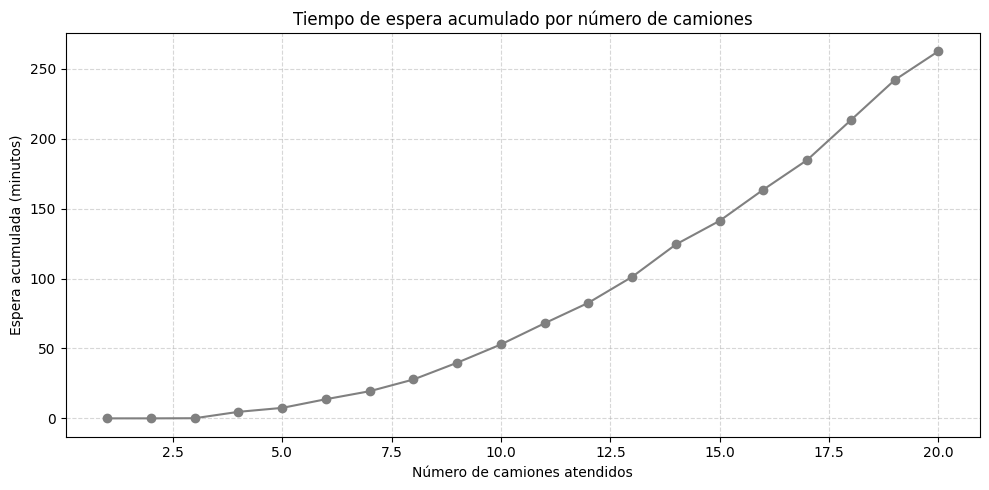

In [13]:
# Creamos una nueva columna con el acumulado
camiones['Espera acumulada'] = camiones['Tiempo de espera (min)'].cumsum()

# Gráfica de línea
plt.figure(figsize=(10, 5))
plt.plot(camiones.index + 1, camiones['Espera acumulada'], marker='o', color='gray')

plt.title('Tiempo de espera acumulado por número de camiones')
plt.xlabel('Número de camiones atendidos')
plt.ylabel('Espera acumulada (minutos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**¿Qué se puede interpretar?**

- El crecimiento constante de la línea indica que el sistema acumula espera a lo largo del tiempo.
- Si la línea subiera de forma más vertical, significaría que los camiones están esperando demasiado.
- En este caso, aunque hay acumulación, **el crecimiento no es tan abrupto**, por lo que **el sistema funciona de manera aceptable con 2 silos**, aunque podría mejorar.


## PASO 4: CONCLUSIONES

Después de realizar la simulación de tiempos de espera para 20 camiones con 2 silos, se pueden sacar las siguientes conclusiones:

- ✅ **La simulación muestra que el sistema puede funcionar bien**, pero no está libre de momentos de congestión. Aunque varios camiones no esperaron, otros sí lo hicieron por varios minutos.

- ✅ La **gráfica de barras** nos permitió ver claramente qué camiones tuvieron mayor tiempo de espera. Se identificaron algunos casos con esperas más largas, lo cual indica que los silos estuvieron ocupados en ciertos momentos críticos.

- ✅ La **gráfica de espera acumulada** mostró que el sistema acumula carga conforme avanzan los turnos. Aunque no fue un crecimiento muy acelerado, sí se nota que hay momentos donde los tiempos de espera se suman rápidamente.

- ✅ En conjunto, las gráficas permiten **visualizar atascos** y pensar si sería útil aumentar la capacidad de carga o espaciar mejor la llegada de camiones.

- ✅ Usar la simulación de Monte Carlo fue útil porque permitió analizar el sistema con datos aleatorios. A pesar de no tener datos reales, se pudieron observar tendencias y tomar decisiones simuladas.

Este tipo de simulación puede aplicarse en plantas reales para mejorar la logística, planear turnos y evitar retrasos en obra por tiempo de espera.



## Referencias 

- **Simulación de Monte Carlo**  
  - Introducción a la Simulación Monte Carlo - Khan Academy. Recuperado en (https://es.khanacademy.org/computing/computer-science/cryptography/modern-crypt/v/monte-carlo-method)

